## Anomaly Detection

This is the working code of Anomaly Detection using Gaussian Distribution

This Code is written in Python programing Language.Following Library is being used currently

## 1 - Packages ##

First, let's run the cell below to import all the packages that you will need during this assignment. 
- [numpy](www.numpy.org) is the fundamental package for scientific computing with Python.
- [h5py](http://www.h5py.org) is a common package to interact with a dataset that is stored on an H5 file.
- [matplotlib](http://matplotlib.org) is a famous library to plot graphs in Python.
- [scipy](https://www.scipy.org/) are used here to test your model with .mat dataset

# Importing Libraries 
Following code import's all used librares

In [1]:
import scipy.io
from scipy import stats
import numpy as np
import seaborn as sns
import h5py
import matplotlib.pyplot as plt
import math
import matplotlib.mlab as mlab
from sklearn.mixture import GaussianMixture
from matplotlib.patches import Ellipse

E:\anaconda\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


# Loading DataSet

Following Code Snippet imports both the datasets using scipy library 

In [2]:
Small_data_set = scipy.io.loadmat('ex8data1.mat')
Large_data_set =  scipy.io.loadmat('ex8data2.mat')
small_data = Small_data_set['X']
cross_validation_xval=Small_data_set['Xval']
yval=Small_data_set['yval']
small_data = np.array(small_data)
cross_validation_xval= np.array(cross_validation_xval)
yval=np.array(yval)
large_data = Large_data_set['X']
large_data = np.array(large_data)
large_xval = Large_data_set['Xval']
large_yval = Large_data_set['yval']

In [3]:
print(large_xval.shape)

(100, 11)


## Plotting the dataset
Code below plots the small dataset using in 2-dimensional plane using matplotlib library

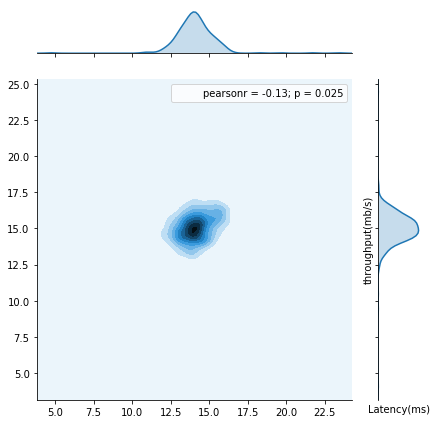

In [4]:
#gmm = GaussianMixture(n_components=1).fit(small_data)
#labels = gmm.predict(small_data)
sns.jointplot(small_data[:,0],small_data[:,1],kind='kde',size=6,space=0.6)
"""plt.scatter(small_data[:,0],small_data[:,1],c=labels, s=40, marker='.',cmap='viridis')"""
plt.xlabel('Latency(ms)')
plt.ylabel('throughput(mb/s)')
plt.show()

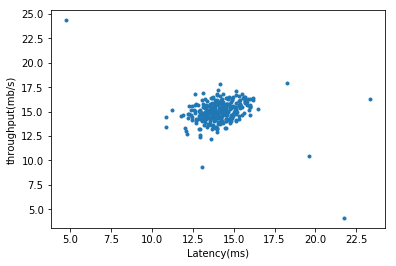

In [5]:
plt.scatter(small_data[:,0],small_data[:,1],marker='.',cmap='viridis')
plt.xlabel('Latency(ms)')
plt.ylabel('throughput(mb/s)')
plt.show()

## Size of dataset

In [6]:
print(small_data.shape)
print(large_data.shape)

(307, 2)
(1000, 11)


## Dataset (small)

In [7]:
print(small_data)

[[13.04681517 14.74115241]
 [13.40852019 13.7632696 ]
 [14.19591481 15.85318113]
 [14.91470077 16.17425987]
 [13.57669961 14.04284944]
 [13.92240251 13.40646894]
 [12.82213164 14.22318782]
 [15.67636615 15.89169137]
 [16.16287532 16.20299807]
 [12.66645095 14.89908374]
 [13.98454962 12.95800822]
 [14.06146043 14.54908874]
 [13.38988671 15.56202142]
 [13.39350475 15.62698794]
 [13.97900926 13.28061494]
 [14.16791259 14.46583829]
 [13.96176145 14.75182421]
 [14.45899735 15.07018563]
 [14.58476372 15.82743424]
 [12.07427074 13.0671109 ]
 [13.5491294  15.53827677]
 [13.98625042 14.78776304]
 [14.96991942 16.51830493]
 [14.25576597 15.29427277]
 [15.33425    16.12469989]
 [15.6350487  16.49094477]
 [13.62081292 15.45947525]
 [14.81548485 15.33956527]
 [14.59318973 14.61238106]
 [14.48906755 15.64087368]
 [15.52704801 14.63568031]
 [13.97506707 14.76531533]
 [12.95364954 14.82328512]
 [12.88787444 15.0760781 ]
 [16.02178961 16.25746992]
 [14.92629271 16.29725072]
 [12.465594   14.18321212]
 

## Dataset(Large)

In [8]:
print(large_data)

[[  6.65311366  13.68970163  17.55284534 ...  -4.88402408   5.34933534
   17.35137235]
 [ -5.63054206 -18.93766731  18.64462416 ...  -2.87717344  -6.00942041
   19.21063612]
 [  9.72152507  -9.98248898  15.57143412 ...   0.7275748   10.392975
    7.0859949 ]
 ...
 [  5.42020917  -5.10984522  12.19219937 ... -13.89942441   9.41801605
    1.84138358]
 [ 11.60473151  -9.13417459  19.58251695 ...   1.01426524  -0.7840654
    6.2179038 ]
 [  9.49130218 -12.82373283  -0.51710828 ...  -9.044737     7.70413334
    3.74875986]]


In [12]:
mu = np.mean(small_data,axis=0)
sigma = np.std(small_data,axis=0)
d = stats.norm.pdf(small_data,loc = mu,scale=sigma)
print(d)

[[2.16209766e-01 2.99284746e-01]
 [2.57452082e-01 1.95392360e-01]
 [2.94132233e-01 2.46318960e-01]
 [2.47211916e-01 2.03532847e-01]
 [2.72515466e-01 2.33693033e-01]
 [2.91811896e-01 1.45498944e-01]
 [1.87139581e-01 2.56009184e-01]
 [1.51176483e-01 2.41513408e-01]
 [9.35633051e-02 1.99499131e-01]
 [1.66608997e-01 3.04234834e-01]
 [2.93387080e-01 9.03757846e-02]
 [2.94487687e-01 2.87662344e-01]
 [2.55592373e-01 2.77971214e-01]
 [2.55956210e-01 2.71738636e-01]
 [2.93271402e-01 1.28818680e-01]
 [2.94445597e-01 2.80876874e-01]
 [2.92880166e-01 2.99754412e-01]
 [2.85183307e-01 3.04633203e-01]
 [2.77277592e-01 2.49464313e-01]
 [9.48976543e-02 1.02581058e-01]
 [2.70272714e-01 2.80112059e-01]
 [2.93421614e-01 3.01193924e-01]
 [2.41105554e-01 1.55160458e-01]
 [2.93042880e-01 2.97354362e-01]
 [1.96077288e-01 2.10442712e-01]
 [1.56529793e-01 1.58947532e-01]
 [2.75904586e-01 2.86657540e-01]
 [2.57496215e-01 2.94850510e-01]
 [2.76670469e-01 2.92137100e-01]
 [2.83495304e-01 2.70338163e-01]
 [1.706828

## Gaussian function 
following function implements the gaussian 

In [13]:
def gaussian(X,mean,sigma):
    p = (1/math.sqrt(2*3.14*sigma*sigma))*np.exp(((X-mean)*(X-mean))/2*sigma*sigma)
    return p

## Density Function
This function will return the probability density of the examples of our examples

In [14]:
def probability_density(i):
    p = d[i,0]*d[i,1]
    return p


### Plotting the dense region using countour plotting

In [15]:
def draw_ellipse(position,  ax=None, **kwargs):
    ax = ax or plt.gca()  
    angle = 0
    width, height = 2 * np.sqrt(sigma)    
    # Draw the Ellipse
    for nsig in range(1, 4):
        ax.add_patch(Ellipse(position, nsig * width, nsig * height,
                             angle, **kwargs))
        
def plot_gmm(gmm, X, label=True, ax=None):
    ax = ax or plt.gca()
    labels = gmm.fit(X).predict(X)
    if label:
        ax.scatter(X[:, 0], X[:, 1], c=labels, s=40,marker='.', cmap='viridis', zorder=2)
    else:
        ax.scatter(X[:, 0], X[:, 1], c=labels, s=40,marker='.', cmap='viridis', zorder=2)
    ax.axis('equal')
    
    w_factor = 0.2 / gmm.weights_.max()
    for pos, w in zip(gmm.means_, gmm.weights_):
        draw_ellipse(pos, alpha=w * w_factor)

In [16]:
gmm = GaussianMixture(n_components=1, random_state=42).fit(small_data)
plot_gmm(gmm, small_data)

## Calculating Epsilon
This module calculates epsilon using the cross_validation data set,for verification we use f1 score method to get the desired value of 'e'   

In [18]:
mu = np.mean(cross_validation_xval,axis=0)
sigma = np.std(cross_validation_xval,axis=0)
dval = stats.norm.pdf(cross_validation_xval,loc=mu,scale=sigma)
epsilon= Threshold(dval,yval)
#print("episilon")
print(epsilon)



7.86473128486759e-05
7.86473128486759e-05


In [17]:
def Threshold(dval,yval):
    bestEpsilon = 0
    bestF1 = 0
    F1 =0
    tp=-0
    fp=0
    fn=0
    prec=0
    rec =0
    p=np.empty([307])
    pval = np.empty([307])
    for i in range(0,307):
        pval[i] = dval[i,0]*dval[i,1]
        
   # print(pval)
    stepsize = (max(pval) - min(pval)) / 1000
    print(stepsize)
    e = min(pval)
    #print(e)
    while(e<max(pval)):
        for i in range(0,307):
            if (p[i]<e):
                p[i]=1
            elif p[i]>e:
                p[i]=0
        for j in range(0,307):
            if ((p[j]==1) and (yval[j] ==1)):
                tp=tp+1
            elif ((p[j]==1) and (yval[j]==0)):
                fp=fp+1
            elif((p[j]==0) and (yval[j]==1)):
                fn=fn+1
        prec = tp/(tp + fp)
        rec = tp/(tp + fn)
        F1 = (2* prec *rec)/(prec +rec)
        #print(F1)
        if F1 > bestF1:
            bestF1 = F1
            bestEpsilon = e    
        e= e+stepsize
   # print(bestF1)
    return bestEpsilon+stepsize

## Anomaly Prediction
The following code predicts anomaly using best episilon red stars are anomaly

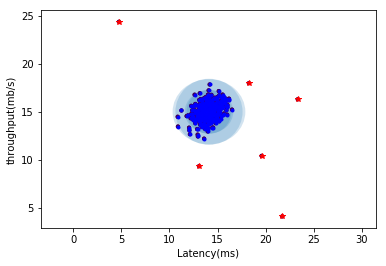

In [19]:
for i in range(0,307):
    p= probability_density(i)
    if(p<epsilon):
        plt.plot(small_data[i,0],small_data[i,1],'r*')
    else:
        plt.plot(small_data[i,0],small_data[i,1],'b.')
gmm = GaussianMixture(n_components=1, random_state=42).fit(small_data)
plot_gmm(gmm, small_data)
plt.xlabel('Latency(ms)')
plt.ylabel('throughput(mb/s)')
plt.show()

## cross validating our result

Following code does a comparison based upon our result and actual result

In [52]:
pa=1
ac=0
pval = np.empty([307])
for i in range(0,307):
        pval[i] = dval[i,0]*dval[i,1]
for i in range (0,307):
    if (pval[i]<=epsilon):
        pa=pa+1
for i in range(0,307):
    if(yval[i]==1):
        ac=ac+1
ac = a(ac)
print("Predicted anomaly:=> ",pa)
print("Actual anomaly:=> ",ac)
print("% accuracy:=>",100* pa/ac)

Predicted anomaly:=>  6
Actual anomaly:=>  7
% accuracy:=> 85.71428571428571


In [19]:
def draw_ellipse(position,  ax=None, **kwargs):
    ax = ax or plt.gca()  
    angle = 0
    width, height = 2 * sigma    
    # Draw the Ellipse
    for nsig in range(1, 4):
        ax.add_patch(Ellipse(position, nsig * width, nsig * height,
                             angle, **kwargs))
def a(pa):
    return pa-2        
def plot_gmm(gmm, X, label=True, ax=None):
    ax = ax or plt.gca()
    labels = gmm.fit(X).predict(X)
    if label:
        ax.scatter(X[:, 0], X[:, 1], c=labels, s=40,marker='.', cmap='viridis', zorder=2)
    else:
        ax.scatter(X[:, 0], X[:, 1], c=labels, s=40,marker='.', cmap='viridis', zorder=2)
    ax.axis('equal')
    
    w_factor = 0.2 / gmm.weights_.max()
    for pos, w in zip(gmm.means_, gmm.weights_):
        draw_ellipse(pos, alpha=w * w_factor)

## Applying on Large Data set

In [23]:
mu = np.mean(large_xval,axis=0)
sigma = np.std(large_xval,axis=0)
dval = stats.norm.pdf(large_xval,loc=mu,scale=sigma)
print(dval.shape)
ep = Threshold_large(dval,large_yval)
print(ep)

(100, 11)
8.310289293025693e-20
8.525897178678872e-25
8.525897178678872e-25


In [21]:
def Threshold_large(dval,large_yval):
    bestEpsilon = 0
    bestF1 = 0
    F1 =0
    tp=-0
    fp=0
    fn=0
    prec=0
    rec =0
    mul = 1
    p = np.empty([100])
    probdens=np.empty([100])
    for i in range(100):
        for j  in range(11):
            mul = mul * dval[i,j]
        probdens[i] = mul
        mul =1 
        
   
    stepsize = (max(probdens) - min(probdens)) / 10000
    print(stepsize)
    e = min(probdens)
    print(e)
    while(e<max(probdens)):
        for i in range(0,100):
            if (p[i]<e):
                p[i]=1
            elif p[i]>e:
                p[i]=0
        for j in range(0,100):
            if ((p[j]==1) and (large_yval[j] ==1)):
                tp=tp+1
            elif ((p[j]==1) and (large_yval[j]==0)):
                fp=fp+1
            elif((p[j]==0) and (large_yval[j]==1)):
                fn=fn+1
        prec = tp/(tp + fp)
        rec = tp/(tp + fn)
        F1 = (2* prec *rec)/(prec +rec)
       
        if F1 > bestF1:
            bestF1 = F1
            bestEpsilon = e    
        e= e+stepsize
   
    return bestEpsilon

## Results for large dataset


In [31]:
pa=1
ac=0
mul = 1
mean = np.mean(large_xval,axis=0)
std_dev = np.std(large_xval,axis=0)
d = stats.norm.pdf(large_data,loc=mean,scale=std_dev)
probdens=np.empty([1000])
for i in range(1000):
    for j  in range(11):
        mul = mul * d[i,j]
    probdens[i] = mul
    mul =1
for i in range (0,1000):
    if (probdens[i]<=1.377229e-018):
        pa=pa+1
        
print("Predicted anomaly:=> ",pa)


Predicted anomaly:=>  116
